In [1]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()

east: /data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000030.fits, west: /data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000030.fits


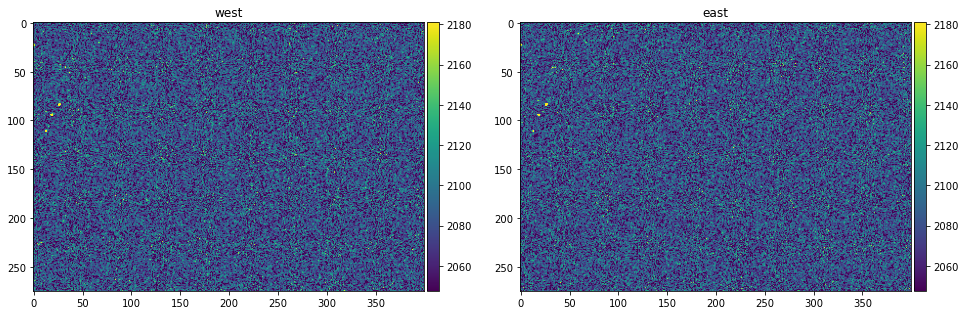

east: /data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000031.fits, west: /data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000031.fits


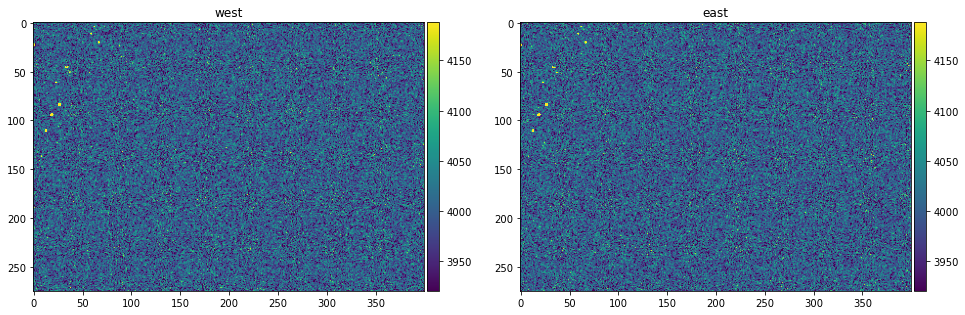

In [2]:
%matplotlib inline
from plotimg import plot_images, fits

for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [3]:
await lvm.sci.foc.start()

east: /data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000032.fits, west: /data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000032.fits


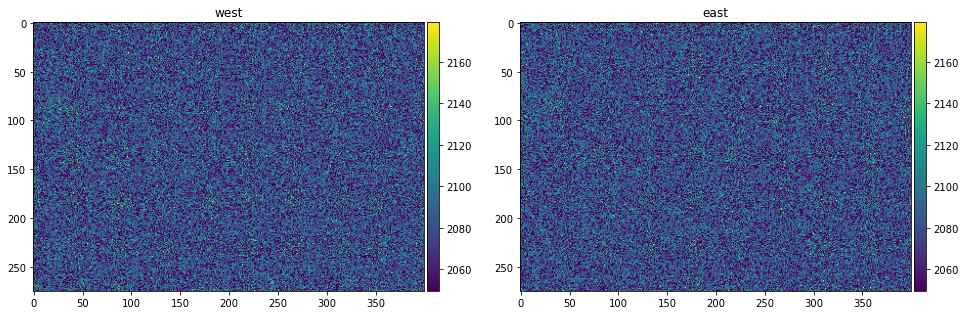

east: /data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000033.fits, west: /data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000033.fits


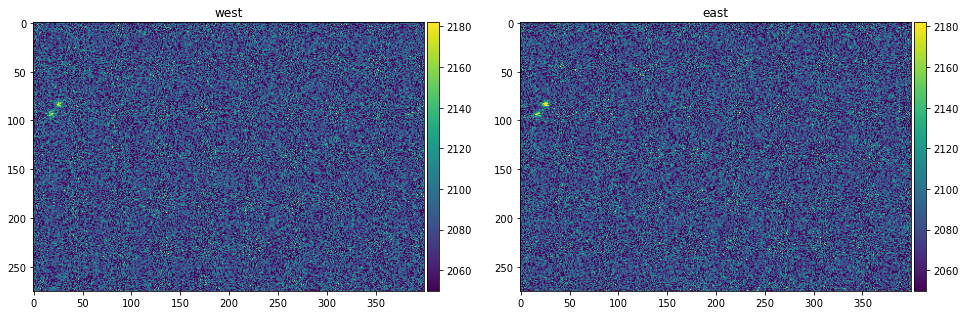

east: /data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000034.fits, west: /data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000034.fits


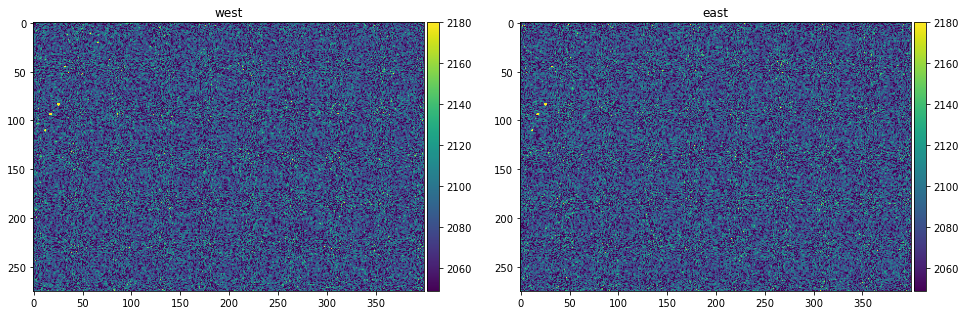

{'Reachable': True,
 'AtHome': True,
 'Moving': False,
 'PositionSwitchStatus': 254,
 'Position': 0.0,
 'DeviceEncoder': {'Position': 0.0, 'Unit': 'STEPS'},
 'Velocity': 0.0,
 'AtLimit': False}

In [4]:
%matplotlib inline

for p in [600, 300, 0]:
    await lvm.sci.foc.moveAbsolute(p)
    ef, wf = (await lvm.sci.agc.expose(1)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

await lvm.sci.foc.moveToHome()

In [5]:
from lvm.tel.focus import Focus
from logging import DEBUG, INFO

telsys = await lvm.sci.start()
focus = Focus(telsys, level = DEBUG)

await focus.offset(100) 

await focus.nominal(20.4)

await focus.fine(1)


[DEBUG]: foc move to 100 um
[DEBUG]: foc move to 400
[DEBUG]: expose 1
[DEBUG]: foc move to 200
[DEBUG]: expose 1
[DEBUG]: foc move to 100
[DEBUG]: expose 1
[DEBUG]: foc move to 0
[DEBUG]: expose 1
[DEBUG]: foc move to -100
[DEBUG]: expose 1
[INFO]: {'east': ['/data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000035.fits', '/data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000036.fits', '/data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000037.fits', '/data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000038.fits', '/data/lvm/sci/agcam/east/20220704/lvm.sci.agcam.east_00000039.fits'], 'west': ['/data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000035.fits', '/data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000036.fits', '/data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000037.fits', '/data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000038.fits', '/data/lvm/sci/agcam/west/20220704/lvm.sci.agcam.west_00000039.fits']}
